#Ploting my Caves of Qud data

Having previously cleaned the data it's now time to pull it into a pandas dataframe and get some info from it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

col_names = ["Name", "End Time", "Game End Time", "Enemy", "x hit", "Damage", "Weapon", "PV", "Pos Dam", "Score", "Turns", "Zones", "Storied Items", "Artifact"]

#read in the data from the text file, setting the seperator between each column as "\t". 
qud = pd.read_csv("Cleaned_Qud_HighScores_1.txt", sep=r"\t+", names = col_names, engine='python')
qud.head()

Populating the interactive namespace from numpy and matplotlib


,Name,End Time,Game End Time,Enemy,x hit,Damage,Weapon,PV,Pos Dam,Score,Turns,Zones,Storied Items,Artifact
0,Goethe II,"Thursday, August 13, 2015 6:04:58 PM",20th of Uru Ux,Wahmahcalcalit,0,0,lase beam,0,0,48753,35235,260,1,HE Missile
1,Kant XVIII,"Sunday, August 30, 2015 7:34:00 PM",27th of Tuum Ut,chute crab,1,2,crab claw,7,1d2,40178,37145,222,1,Fix-It spray foam x2
2,O'Brien III,"Wednesday, September 02, 2015 3:50:10 AM",6th of Tebet Ux,"Kumukokumu the Stylish, legendary ogre ape",8,51,ape fist,20,3d3,20556,21114,130,0,force bracelet 0 0 <> [no cell]
3,Kant XII,"Friday, August 28, 2015 11:14:48 PM",7th of Iyur Ut,Putus Templar warden,1,3,folded carbide long sword,9,2d5,17061,17066,118,0,electrobow <> ->10 1d6 [no cell]
4,Nietzsche III,"Wednesday, August 05, 2015 8:00:46 PM",19th of Tishru ii Ux,eyeless king crab,6,20,massive king crab claw,20,1d6,16607,16124,115,0,ubernostrum injector <>


In [2]:
#Dropping these two values
print qud.iloc[53].values #Forgot to name my character. Deceided to quit by attacking either Mehmet or Warden Ualraig
print qud.iloc[54].values #Took one step and Ualraig wasted Mehmet. Walked around for a while but quit as I could not longer start the "What's Eating The Watervine? mission

#As these are my two lowest scores I can the set the dataframe to be rows 0 to 53 (does not include 53)
qud = qud[0:53]
qud.tail(3)

['Game summary for' 'Friday, August 21, 2015  11:25:56 PM'
 'died on the 8th of Nivvun Ut' 'Warden Ualraig' 0 0 'Freezes' 0 '0' -1451
 19 1 0 'no artifact']
['Napoleon' 'Monday, August 03, 2015  3:23:01 PM' '18th of Tuum Ut' 'quit'
 0 0 'quit' 0 '0' -1588 95 1 0 'no artifact']


,Name,End Time,Game End Time,Enemy,x hit,Damage,Weapon,PV,Pos Dam,Score,Turns,Zones,Storied Items,Artifact
50,Goethe,"Sunday, August 09, 2015 7:43:13 PM",Goethe died on the 22nd of Tuum Ut,boar,2,6,bite,7,1d3,-1253,121,3,0,no artifact
51,Malenkov,"Sunday, August 02, 2015 1:34:01 PM",9th of Tishru ii Ux,traipsing mortar,0,0,explosion,0,0,-1318,130,5,0,no artifact
52,Khrushchev III,"Sunday, August 02, 2015 4:19:46 PM",1st of Nivvun Ut,scalding steam,0,0,scalding steam,0,0,-1351,324,4,0,no artifact


##Further Cleaning

With the data now pulled into a dataframe there is still a small bit of cleaning to do. Below are three functions to convert the End Time of each game to a datetime, to pull the game month from the Game End Time (I left the day in as at a later time I might check am I more likely to die early or late in the month) and to clean up the Artifact column

In [3]:
import re
from datetime import datetime
from time import strptime

def convert_to_date(date_in):
    date_search = re.search("(\w{6,9}),\s*(\w{3,9})\s*(\d{2}),\s*(\d{4})\s*(\d{1,2}):(\d{2}):(\d{2})\s*(\w{2})", date_in)
    #date_search.group(1) = Day as word(ie Sunday), 2 = Month as word (ie August), 3 = day of month, 4 = year, 5 = hour, 6 = minute, 7 = second, 8 = AM or PM
    
    #In End Time hour is expressed from 1 to 12, ie 1 AM or 1 PM. The below code converts that to 0 to 23, ie 1 or 13
    hour = int(date_search.group(5))

    if date_search.group(8) == "PM":
        if hour == 12:
            pass
        else:
            hour += 12
    
    if date_search.group(8) == "AM":
        if hour == 12:
            hour = 0
            
    
    #Create a datetime. strptime is used to take the first 3 letters of the Month as word and get the int value for that month, ie August = Aug, is month 8 of 12
    new_date = datetime(int(date_search.group(4)), strptime(date_search.group(2)[:3], "%b").tm_mon, int(date_search.group(3)), hour, int(date_search.group(6)), int(date_search.group(7)))
        
    return new_date

qud["End Time"] = qud["End Time"].apply(convert_to_date)

In [4]:
#Pull the month out of Game Time

def convert_game_month(date_in):
    date_search = re.search("of\s*((\w*\s*)*)", date_in)
    return date_search.group(1)

qud["Game End Time"] = qud["Game End Time"].apply(convert_game_month)

In [5]:
def clean_artifacts(artifact):
    x_search = re.search("(x\d+)", artifact) #remove multipliers like "x2"
    if x_search != None:
        artifact = artifact.replace(x_search.group(0), "").strip()
    
    mul_search = re.search("((-?\d+\s*\d+d\d+)+)", artifact) #removes pv and possible weapon damage like "2 1d3"
    if mul_search != None:
        artifact = artifact.replace(mul_search.group(0), "").strip()
        
    artifact = artifact.replace("->", "").replace("<>", "").strip() #removes -> and <> which should be empty from previous cleaning
        
    cell_search = re.search("(\[(\w*\s*)*\])", artifact) #removes [no cell], [shotgun shell] etc
    if cell_search != None:
        artifact = artifact.replace(cell_search.group(0), "").strip()
        
    digit_search = re.search("((\d+\s*)+)", artifact) #removes any remaining digits such as av dv ie 2 4
    if digit_search != None:
        artifact = artifact.replace(digit_search.group(0), "").strip()
        
    return artifact

qud["Artifact"] = qud["Artifact"].apply(clean_artifacts)
qud.head() #print new, clean dataframe

,Name,End Time,Game End Time,Enemy,x hit,Damage,Weapon,PV,Pos Dam,Score,Turns,Zones,Storied Items,Artifact
0,Goethe II,2015-08-13 18:04:58,Uru Ux,Wahmahcalcalit,0,0,lase beam,0,0,48753,35235,260,1,HE Missile
1,Kant XVIII,2015-08-30 19:34:00,Tuum Ut,chute crab,1,2,crab claw,7,1d2,40178,37145,222,1,Fix-It spray foam
2,O'Brien III,2015-09-02 03:50:10,Tebet Ux,"Kumukokumu the Stylish, legendary ogre ape",8,51,ape fist,20,3d3,20556,21114,130,0,force bracelet
3,Kant XII,2015-08-28 23:14:48,Iyur Ut,Putus Templar warden,1,3,folded carbide long sword,9,2d5,17061,17066,118,0,electrobow
4,Nietzsche III,2015-08-05 20:00:46,Tishru ii Ux,eyeless king crab,6,20,massive king crab claw,20,1d6,16607,16124,115,0,ubernostrum injector


##Sorting by date and by score

With the End Time now cleaned up and converted to a datetime the entire dataframe can be sorted on this column, giving the dataframe in order of my earliest game to my most recent game. I can then print off my highscore progression and after sorting the dataframe by score I can print my 5 highest scores. 

In [6]:
sorted_qud = qud.sort(["End Time"]).reset_index(drop = True) #Sort by End Time, reset the index and drop the old index
highscore = -10000
print "Highscore Progression" #Game Number, Name, Date, Score
for score in sorted_qud["Score"]:
    if int(score) > highscore:
        highscore = int(score)
        print "%d %s %s %d" % (
        int(sorted_qud.index[sorted_qud["Score"] == score][0])+ 1, #the index value of the game + 1. My first game is at index 0 so add 1 and this becomes game 1
        sorted_qud["Name"][sorted_qud["Score"] == score].tolist()[0], #Character's name
        sorted_qud["End Time"][sorted_qud["Score"] == score].tolist()[0], #End Time of game
        int(score) #Score
        )
print "\n"        
print "Highest Scores"
sorted_scores = qud.sort(["Score"], ascending = False).reset_index(drop = True) #sort by score
for i in range(5):
    print sorted_scores["Name"].iloc[i], sorted_scores["End Time"].iloc[i], sorted_scores["Score"].iloc[i] #print Name, End Time and Score for first 5 rows

Highscore Progression
1 Stalin 2015-08-01 14:04:38 -1131
2 Stalin 2015-08-01 15:28:05 -71
4 Lenin 2015-08-01 16:08:30 902
16 Khrushchev VIII 2015-08-02 18:19:47 1760
27 Nietzsche III 2015-08-05 20:00:46 16607
29 Goethe II 2015-08-13 18:04:58 48753


Highest Scores
Goethe II 2015-08-13 18:04:58 48753
Kant XVIII 2015-08-30 19:34:00 40178
O'Brien III 2015-09-02 03:50:10 20556
Kant XII 2015-08-28 23:14:48 17061
Nietzsche III 2015-08-05 20:00:46 16607


##Ploting my score data

There are now a number of plots I can build using the data I have pulled down. Two simple scatter plots can be made, one containing points for my score and the number of turns taken in each game and another for my score and the number of zones visited. Using the sklearn library I can plot a linear line to each plot and also use this to predict the score of my current game.

Using the dataframe sorted on date I can plot a bar for the score in each game and then plot a 5 game simple moving average. Red vertical lines are added for patch updates to see if my score is affected by these. The lines represent the 4th, 8th and 15/21st of August (I didn't play any games between the 15th and 21st) and I remember it took me a while to get to grips with the game after the 21st of August patch. I blame Ctesiphus.

The final plot is a histogram of my highscores. Not impressive.

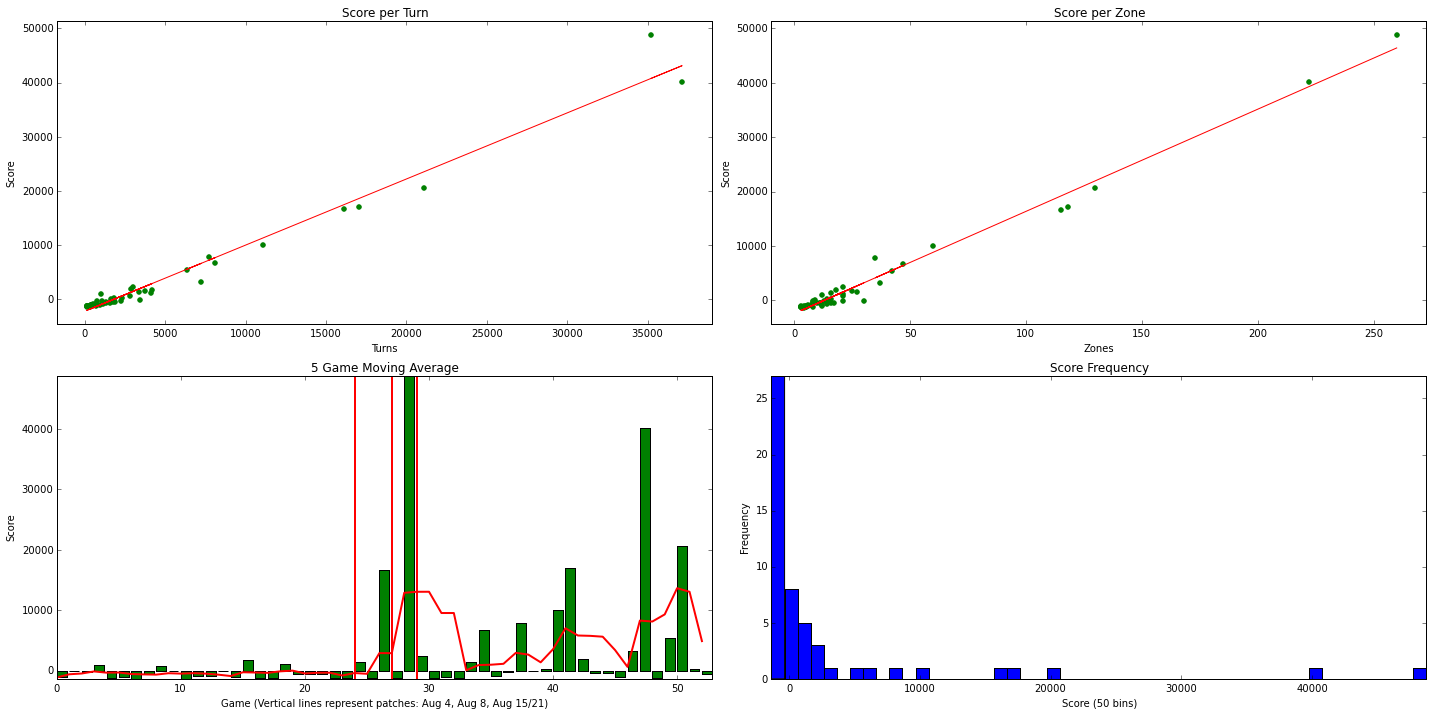

In [7]:
from sklearn import linear_model

fig = plt.figure(figsize = (20,10))
p1 = fig.add_subplot(221) # 2x2, plot 1 (top left)
p2 = fig.add_subplot(222) # 2x2, plot 2 (top right)
p3 = fig.add_subplot(223) # 2x2, plot 3 (bottom left)
p4 = fig.add_subplot(224) # 2x2, plot 4 (bottom right)

#Turns to Score
p1.scatter(qud["Turns"], qud["Score"], color="green") #Turns on x axis, score on y axis, color green (this is Qud after all)

X = np.array(qud["Turns"]).reshape(len(qud),1) #variable X is an np.array of the turns, len(qud) rows, 1 column
y= np.array(qud["Score"]).reshape(len(qud),1) #variable y is an np.array of the scores, len(qud) rows, 1 column

turns_score = linear_model.LinearRegression()
turns_score.fit(X, y) #fit turns and score using linear regression

#plot a line with turns on the x axis and predicted score for that many turns from the linear regression model on the y axis
p1.plot(qud["Turns"], turns_score.predict(X), color="red") 
p1.set_title("Score per Turn")
p1.set_xlabel("Turns")
p1.set_ylabel("Score")
p1.axis('tight')

#Zones to Score
p2.scatter(qud["Zones"], qud["Score"], color="green")
X= np.array(qud["Zones"]).reshape(len(qud),1) #Update X to be an np.array of zones, y stays as score above

zones_score = linear_model.LinearRegression()
zones_score.fit(X, y) #fit zones to score

#plot a line with zones on the x axis and predicted score for that many zones from the linear regression model on the x axis
p2.plot(qud["Zones"], zones_score.predict(X), color="red")
p2.set_title("Score per Zone")
p2.set_xlabel("Zones")
p2.set_ylabel("Score")
p2.axis('tight')

#using the sorted by date dataframe plot a bar chart of the scores. sorted_qud.index.values starts at 0, not 1
p3.bar(sorted_qud.index.values, sorted_qud["Score"], color="green")
p3.plot(pd.rolling_mean(sorted_qud["Score"].values, window=5, min_periods=1), color="red", linewidth=2) #plot a 5 game simple moving average

p3.set_title("5 Game Moving Average")
p3.set_xlabel("Game (Vertical lines represent patches: Aug 4, Aug 8, Aug 15/21)")
p3.set_ylabel("Score")
p3.axis('tight')
#These numbers are plotted manually from looking at the dataframe and seeing when was the first game I played on/after each patch release
p3.axvline(24, color = "red", linewidth = 2) #first game on/after Aug 4th
p3.axvline(27, color = "red", linewidth = 2) #first game on/after Aug 8th
p3.axvline(29, color = "red", linewidth = 2) #first game on/after Aug 15th and 21st

#Histogram. Depressing
p4.hist(qud["Score"], bins = 50);
p4.axis('tight')
p4.set_title("Score Frequency")
p4.set_xlabel("Score (50 bins)")
p4.set_ylabel("Frequency")


plt.tight_layout()

Using the linear regression models I can now get the coefficient, intercept and root mean square error for the score per turn line and the score per zone line. Also, as the number of turns is displayed when a game is saved I can calculate how many points my current save game is worth. However, I would not expect this figure to be very accurate due to the small number of points available and I'm not willing to have my character die to check how right the figure is!

In linear regression y = a + Xb where a is the intercept and b is the coefficient. So using the below data:

score = -2171.04135919 + Turns(1.21948537419)

The root mean square error is found by taking the root of the mean_squared_error of the score compared to the predicted score

With a bit of moving around of figures I get to equation turns = (score + intercept)/coefficient which allows me to predict the number of turns needed for 100,000 points and 1,000,000 points. I have a bit of work to do yet! (I expect these numbers to change substantially as the model gets more data points in the high game points range, over half the data points are in the minus range at the moment)

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print "For Score Per Turn"
print "Total turns multiplied by the coefficient plus the intercept = my score"
print "Coefficient: ", turns_score.coef_[0][0]
print "Intercept: ", turns_score.intercept_[0]
print "RMSE: ", sqrt(mean_squared_error(y, turns_score.predict(np.array(qud["Turns"]).reshape(len(qud),1))))
print "Predicted score from my current game (59924 turns): ", int(turns_score.predict(59924)[0][0])
print "Turns needed for 100,000 points: ", int(math.ceil(((100000 + abs(turns_score.intercept_))/turns_score.coef_)[0][0]))
print "Turns needed for 1,000,000 points: ", int(math.ceil(((1000000 + abs(turns_score.intercept_))/turns_score.coef_)[0][0]))

For Score Per Turn
Total turns multiplied by the coefficient plus the intercept = my score
Coefficient:  1.21948537419
Intercept:  -2171.04135919
RMSE:  1532.50022362
Predicted score from my current game (59924 turns):  70905
Turns needed for 100,000 points:  83783
Turns needed for 1,000,000 points:  821799


In [9]:
print "For Score Per Zone"
print "Total zones visited multiplied by the coefficient plus the intercept = my score"
print "Coefficient: ", zones_score.coef_[0][0]
print "Intercept ", zones_score.intercept_[0]
print "RMSE: ", sqrt(mean_squared_error(y, zones_score.predict(np.array(qud["Zones"]).reshape(len(qud),1))))

For Score Per Zone
Total zones visited multiplied by the coefficient plus the intercept = my score
Coefficient:  187.832983072
Intercept  -2433.84828011
RMSE:  1141.29924083


#A look at some of the remaining data

I took in a lot of data into the dataframe but have only looked at End Time, score, zone and turns. As time goes on and I get more entries I may be able to do more with the following bits of data

In [10]:
#Each month mentioned in the Game End Time
game_months = qud["Game End Time"]
print np.unique(game_months)
print len(np.unique(game_months))

['Iyur Ut' 'Kisu Ux' 'Nivvun Ut' 'Shwut Ux' 'Simmun Ut' 'Tebet Ux'
 'Tishru i Ux' 'Tishru ii Ux' 'Tuum Ut' 'Ubu Ut' 'Uru Ux' 'Uulu Ut']
12


In [11]:
#Use groupby to find most mentioned month, ie the month I have died most in. Nivvun Ut is the very first month...
qud['Game End Time'].groupby(qud['Game End Time']).count().order(ascending = False)

Game End Time
Tuum Ut         8
Uru Ux          7
Nivvun Ut       7
Tishru i Ux     6
Uulu Ut         5
Tishru ii Ux    5
Iyur Ut         4
Shwut Ux        3
Kisu Ux         3
Ubu Ut          2
Tebet Ux        2
Simmun Ut       1
Name: Game End Time, dtype: int64

In [12]:
#Use group by to find the most advanced artifact I held when I died. Lots of no artifacts and lots of artifacts awarded for finishing the first 2 missions in Joppa
qud['Artifact'].groupby(qud['Artifact']).count().order(ascending = False)

Artifact
no artifact                37
Fix-It spray foam           3
semi-automatic pistol       2
acid gas grenade mk I       2
ubernostrum injector        1
stun gas grenade mk I       1
pump shotgun                1
poison gas grenade mk I     1
force bracelet              1
electrobow                  1
compass bracelet            1
blaze injector              1
HE Missile                  1
Name: Artifact, dtype: int64

I have done slightly more work with the Enemy column. First I print it off as is but then make some changes. 
Deaths from bleeding were always the result of young ivory. In my early games I took hemophilia as a defect which basicly meant instant death at low toughness levels and no bandages when I stared bleeding, so "bleeding" and "young ivory" are combined into a single group.

Deaths from scalding steam were always the result of fire ants setting the water around me on fire and I, like an idiot, taking a step forward. Only once was there another reason...I set the water on fire with my Flaming Hands and walked into it. Since then I have only used Freezing Hands.

All snapjaws, including the two faction leaders, are put into a single catagory.

"Wahmahcalcalit", "Umchuum", "Duhmahcaluhcal" are evidence my character was suffering confusion when he died, these were 3 wizard faction leaders.

I could do further grouping. Chute crab and king crab could be combined, the two named Snapjaws could be put in with the ogre instead to form a Named or Faction Leader catagory, dawnglider could be added to the fire ant/scalding steam catagory etc.

In [13]:
qud['Enemy'].groupby(qud['Enemy']).count().order(ascending = False)

Enemy
bleeding                                               9
unknown                                                8
salthopper                                             4
scalding steam                                         3
equimax                                                2
snapjaw scavenger                                      2
jilted lover                                           2
Wahmahcalcalit                                         1
chute crab                                             1
cave spider                                            1
boar                                                   1
young ivory                                            1
dawnglider                                             1
Ruf-ohoubub, the stalwart Snapjaw Bear-baiter          1
Putus Templar warden                                   1
Kumukokumu the Stylish, legendary ogre ape             1
Groubuubu-wof-wofuz, the stalwart Snapjaw Tot-eater    1
Umchuum                  

In [14]:
#create a list called enemies, add new values to it, convert to a dataframe and groupby name
enemies = qud["Enemy"].tolist()
for i in range(len(enemies)):
    name = enemies[i].strip()
    if name in ["Wahmahcalcalit", "Umchuum", "Duhmahcaluhcal"]:
        enemies[i] = "wizard"
    if name in ["snapjaw scavenger", "napjaw scavenger", "snapjaw hunter", "Groubuubu-wof-wofuz, the stalwart Snapjaw Tot-eater", "Ruf-ohoubub, the stalwart Snapjaw Bear-baiter"]:
        enemies[i] = "snapjaw"
    if name in ["young ivory", "bleeding"]:
        enemies[i] = "young ivory/bleeding" 
    if name in ["scalding steam", "fire ant"]:
        enemies[i] = "fire ant/scalding steam"

enemy_df = pd.DataFrame(enemies, columns=["Name"])
enemy_df['Name'].groupby(enemy_df['Name']).count().order(ascending = False)

Name
young ivory/bleeding                          10
unknown                                        8
snapjaw                                        6
salthopper                                     4
fire ant/scalding steam                        4
wizard                                         3
jilted lover                                   2
equimax                                        2
explosion                                      1
Putus Templar warden                           1
boar                                           1
cave spider                                    1
chute crab                                     1
dawnglider                                     1
giant amoeba                                   1
eyeless king crab                              1
girshling                                      1
horned chameleon                               1
salamander                                     1
scrap shoveler                                 1
traipsing morta

There are a number of highscores that have an empty line where the death description should be and these are marked unknown. Also, others will just read "died from bleeding". Here bleeding is added as both the enemy name and the weapon.

Below is a look at the weapons that have killed my characters. Rending mandibles. Giant pseudopod. The things I've seen.

In [15]:
qud['Weapon'].groupby(qud['Weapon']).count().order(ascending = False)

Weapon
bleeding                     9
unknown                      8
rending mandibles            4
bite                         4
explosion                    3
scalding steam               3
lase beam                    2
bronze two-handed sword      2
thorns                       2
Umumerchacal                 1
ape fist                     1
carbide battle axe           1
claw                         1
crab claw                    1
flames                       1
fangs                        1
fire                         1
folded carbide long sword    1
giant pseudopod              1
impalement                   1
iron dagger                  1
massive king crab claw       1
scrap shovel                 1
steel battle axe             1
Tusks                        1
Name: Weapon, dtype: int64

Below is the complete dataframe sorted by date

In [16]:
sorted_qud

,Name,End Time,Game End Time,Enemy,x hit,Damage,Weapon,PV,Pos Dam,Score,Turns,Zones,Storied Items,Artifact
0,Stalin,2015-08-01 14:04:38,Nivvun Ut,Umchuum,2,4,Umumerchacal,0,0,-1131,362,3,0,poison gas grenade mk I
1,Stalin,2015-08-01 15:28:05,Uru Ux,salthopper,3,9,rending mandibles,11,1d4,-71,3412,30,0,no artifact
2,Stalin,2015-08-01 15:41:26,Tishru i Ux,explosion,0,0,explosion,0,0,-224,1061,8,0,no artifact
3,Lenin,2015-08-01 16:08:30,Iyur Ut,equimax,3,9,bite,8,2d2,902,1019,12,0,no artifact
4,Malenkov,2015-08-01 16:18:54,Tishru i Ux,"Ruf-ohoubub, the stalwart Snapjaw Bear-baiter",2,10,bronze two-handed sword,4,1d8,-1155,687,8,0,no artifact
5,Malenkov,2015-08-01 16:35:17,Tuum Ut,napjaw scavenger,0,0,explosion,0,0,-1004,911,12,0,no artifact
6,Malenkov,2015-08-02 13:34:01,Tishru ii Ux,traipsing mortar,0,0,explosion,0,0,-1318,130,5,0,no artifact
7,Khrushchev,2015-08-02 14:13:37,Uru Ux,bleeding,0,0,bleeding,0,0,-531,1863,17,0,no artifact
8,Khrushchev,2015-08-02 15:52:52,Tishru ii Ux,"Groubuubu-wof-wofuz, the stalwart Snapjaw Tot-...",2,11,carbide battle axe,5,2d3,708,2789,21,0,no artifact
9,Khrushchev II,2015-08-02 16:13:32,Uru Ux,bleeding,0,0,bleeding,0,0,13,1640,9,0,no artifact
